<a href="https://colab.research.google.com/github/Sanjana-68/Sentiment-Analysis/blob/main/Mini_Project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import scikitplot as skplt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scikitplot.metrics import plot_confusion_matrix

In [ ]:
df_train = pd.read_csv("train.txt",delimiter=';',names=['text','label'])
df_val = pd.read_csv("val.txt",delimiter=';',names=['text','label'])

In [ ]:
df = pd.concat([df_train,df_val])
print("Shape of the DataFrame:",df.shape)
df.reset_index(inplace=True,drop=True)

Shape of the DataFrame: (18000, 2)


In [ ]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df.tail()

,text,label
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy
17999,i feel like i just wanna buy any cute make up ...,joy


In [ ]:
df.shape

(18000, 2)

In [ ]:
df.sample(5)

,text,label
16077,i can really decode but im sorry i have to vom...,anger
10247,i dont and i feel so god damn selfish for cont...,anger
13273,i feel blessed beyond belief to live in a day ...,joy
8937,i feel the carefree days of my youth doing the...,joy
8954,i do feel respected and loved more and more at...,joy


In [ ]:
df.label.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
df.label.value_counts()

label
joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: count, dtype: int64

<Axes: xlabel='label'>

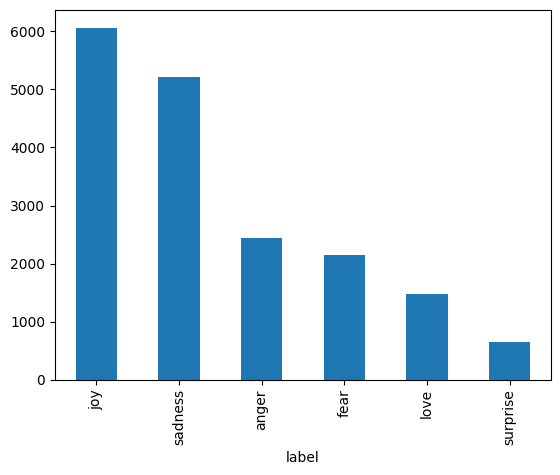

In [ ]:
df.label.value_counts().plot.bar()

In [ ]:
#Positive Sentments= Joy, love, surprise =1
#Negative Sentiments= sadness, anger, fear=0

In [ ]:
def custom_encoder(df):
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)

In [ ]:
custom_encoder(df['label'])

In [ ]:
df.head(10)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0
5,ive been feeling a little burdened lately wasn...,0
6,ive been taking or milligrams or times recomme...,1
7,i feel as confused about life as a teenager or...,0
8,i have been with petronas for years i feel tha...,1
9,i feel romantic too,1


In [ ]:
df.label.value_counts()

label
0    9799
1    8201
Name: count, dtype: int64

<Axes: xlabel='label'>

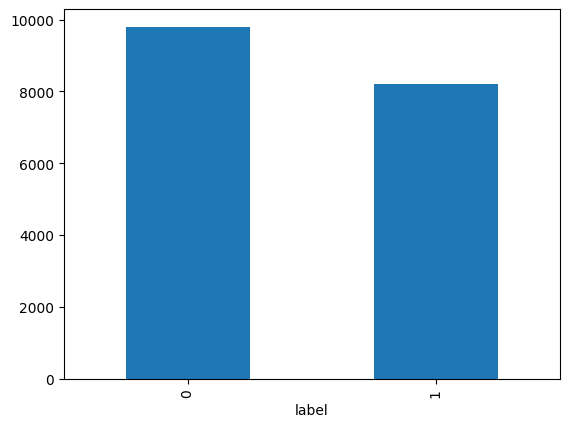

In [ ]:
df.label.value_counts().plot.bar()

In [ ]:
lm = WordNetLemmatizer()

In [ ]:
!pip install re

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [ ]:
import re

In [ ]:
def transformation(df_col):
    output = []
    for i in df_col:
        new_text = re.sub('[^a-zA-Z]',' ',str(i))
        new_text = new_text.lower()
        new_text = new_text.split()
        new_text = [lm.lemmatize(j) for j in new_text if j not in set(stopwords.words('english'))]
        output.append(' '.join(str(x) for x in new_text))
    return output


In [ ]:
var = transformation(df.text)

In [ ]:
var

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

In [ ]:
#Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(var)
X_train = traindata
y_train = df.label

In [ ]:
X_train

<18000x117594 sparse matrix of type '<class 'numpy.int64'>'
	with 311217 stored elements in Compressed Sparse Row format>

In [ ]:
!pip install scikit-learn
import sklearn
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [ ]:
#Hyper Parameter Tuning

parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000, 1500],
             'max_depth': [5, 10, None],
             'min_samples_split': [5,10,15],
             'min_samples_leaf': [1,2,5,10],
             'bootstrap': [True, False]}

In [ ]:
parameters

{'max_features': ('auto', 'sqrt'),
 'n_estimators': [500, 1000, 1500],
 'max_depth': [5, 10, None],
 'min_samples_split': [5, 10, 15],
 'min_samples_leaf': [1, 2, 5, 10],
 'bootstrap': [True, False]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [ ]:
param_dist = {
    'n_estimators': randint(10, 1000),
    'max_features': ['auto', 'sqrt'],
    'max_depth': randint(1, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

In [ ]:
rf = RandomForestClassifier()


In [ ]:
rf.fit(X_train ,y_train)

RandomForestClassifier()

In [ ]:
test_df = pd.read_csv('test.txt',delimiter=';',names=['text','label'])

In [ ]:
X_test,y_test = test_df.text,test_df.label
#encode the labels into two classes , 0 and 1
test_df = custom_encoder(y_test)
#pre-processing of text
test_corpus = transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = rf.predict(testdata)

In [ ]:
test_df = X_test, y_test

In [ ]:
print(X_test.head())

0    im feeling rather rotten so im not very ambiti...
1            im updating my blog because i feel shitty
2    i never make her separate from me because i do...
3    i left with my bouquet of red and yellow tulip...
4      i was feeling a little vain when i did this one
Name: text, dtype: object


In [ ]:
print(rf)

RandomForestClassifier()


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

# Define the function for sentiment analysis.
def sentimental_analysis(input):
    # Transform the input text.
    new_input = transformation(input)

    # Convert the transformed input into a vectorized format.
    transformed_input = cv.transform([new_input])

    # Make a prediction using the trained model.
    prediction = rf.predict(transformed_input)[0]

    # Print the sentiment based on the prediction.
    if prediction == 0:
        print('Negative Sentiment')
    elif prediction == 1:
        print('Positive Sentiment')
    else:
        print('Invalid Sentiment')


print(transformation)

print(cv)
print(rf)


<function transformation at 0x7f917ed57a30>
CountVectorizer(ngram_range=(1, 2))
RandomForestClassifier()


In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def sentimental_analysis(input):
    # Convert the input into a TextBlob object.
    text_blob = TextBlob(input)

    # Analyze the sentiment of the text.
    sentiment = text_blob.sentiment.polarity

    # Print the sentiment score.
    print(sentiment)

In [ ]:
input1 = ["Sometimes I just want to punch someone in the face."]
input2 = ["I bought a new phone and it's so good."]

In [ ]:
print(type(input1))
print(type(input2))

<class 'list'>
<class 'list'>


In [ ]:
print(input1[0].lower())

sometimes i just want to punch someone in the face.


In [ ]:
print(input2[0].lower())

i bought a new phone and it's so good.


In [ ]:
input1 = input1[0]
input2 = input2[0]

In [ ]:
sentimental_analysis(input1)
sentimental_analysis(input2)

0.0
0.41818181818181815


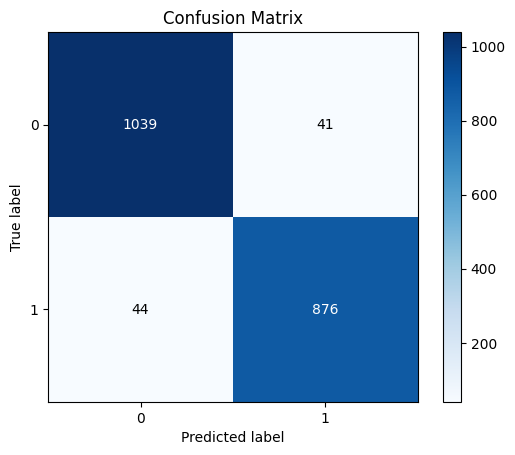

In [ ]:
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)

In [ ]:
print('Accuracy_score: ',acc_score)

Accuracy_score:  0.9575


In [ ]:
input1 = ["I was playing football and i fell"]
print(type(input1))

<class 'list'>


In [ ]:
print(input1[0].lower())

i was playing football and i fell


In [ ]:
input1 = input1[0]

In [ ]:
sentimental_analysis(input1)

0.0
